In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
data=pd.read_csv('../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv')
data1=pd.read_csv('../input/stack-overflow-developer-survey-results-2019/survey_results_schema.csv')

In [11]:
data.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [12]:
data1.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [13]:
data.shape

(88883, 85)

In [14]:
data.info

<bound method DataFrame.info of        Respondent                                         MainBranch Hobbyist  \
0               1             I am a student who is learning to code      Yes   
1               2             I am a student who is learning to code       No   
2               3  I am not primarily a developer, but I write co...      Yes   
3               4                     I am a developer by profession       No   
4               5                     I am a developer by profession      Yes   
...           ...                                                ...      ...   
88878       88377                                                NaN      Yes   
88879       88601                                                NaN       No   
88880       88802                                                NaN       No   
88881       88816                                                NaN       No   
88882       88863                                                NaN      Yes

In [15]:
data.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [16]:
data.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.003357,0.002930,-0.004589,-0.005240,-0.001829
CompTotal,-0.003357,1.000000,0.039725,0.003074,0.061090,0.016500
ConvertedComp,0.002930,0.039725,1.000000,0.013908,-0.021261,0.108268
WorkWeekHrs,-0.004589,0.003074,0.013908,1.000000,0.021092,0.019976
CodeRevHrs,-0.005240,0.061090,-0.021261,0.021092,1.000000,-0.022486
Age,-0.001829,0.016500,0.108268,0.019976,-0.022486,1.000000


In [17]:
data.drop(['CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs','WorkPlan','WorkChallenge','WorkRemote','WorkLoc','ImpSyn','CodeRev','CodeRevHrs','UnitTests','PurchaseHow','PurchaseWhat','OrgSize','YearsCodePro','CareerSat','JobSat','MgrIdiot','MgrMoney','MgrWant','LastInt','FizzBuzz'],axis=1,inplace=True)

In [18]:
data

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult
7,8,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",India,NaN,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,24.0,Man,No,Straight / Heterosexual,NaN,NaN,Appropriate in length,Neither easy nor difficult
8,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or mor

In [19]:
data['Employment'].value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

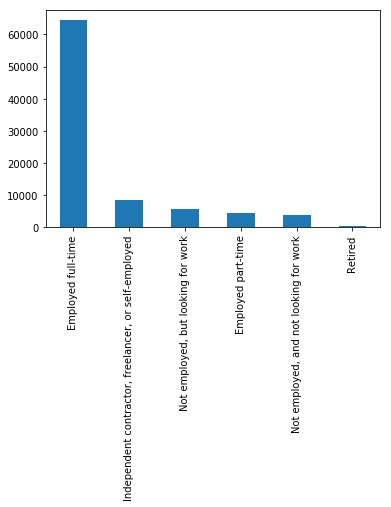

In [20]:
data['Employment'].value_counts().plot(kind='bar')

In [21]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   65679
I am a student who is learning to code                                           10189
I am not primarily a developer, but I write code sometimes as part of my work     7539
I code primarily as a hobby                                                       3340
I used to be a developer by profession, but no longer am                          1584
Name: MainBranch, dtype: int64

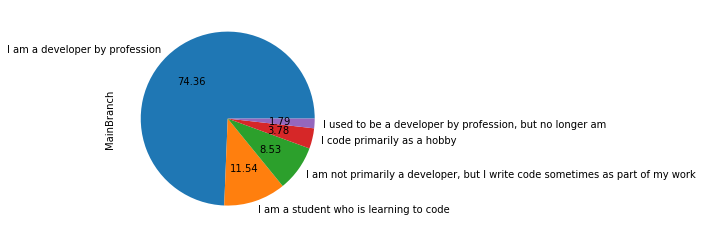

In [30]:
data['MainBranch'].value_counts().plot(kind='pie', autopct='%0.2f')

In [23]:
data['Country'].value_counts().head(10)

United States     20949
India              9061
Germany            5866
United Kingdom     5737
Canada             3395
France             2391
Brazil             1948
Poland             1922
Australia          1903
Netherlands        1852
Name: Country, dtype: int64

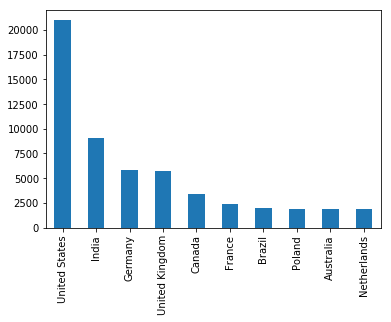

In [24]:
data['Country'].value_counts().head(10).plot(kind='bar')

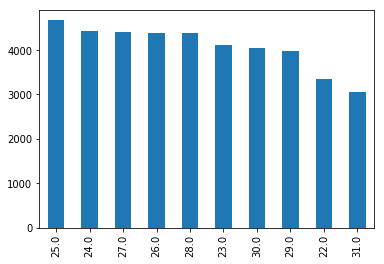

In [25]:
data['Age'].value_counts().head(10).plot(kind='bar')

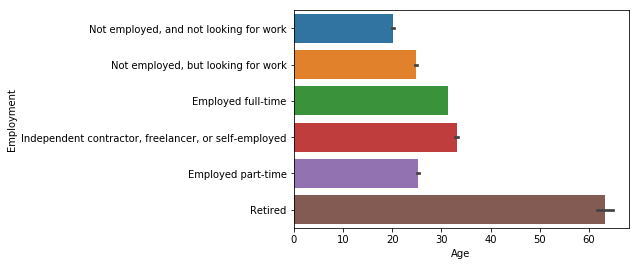

In [33]:
sns.barplot(x='Age',y= 'Employment',data=data)

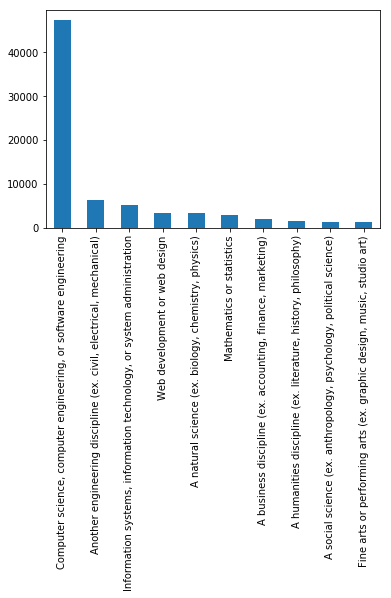

In [34]:
data['UndergradMajor'].value_counts().head(10).plot(kind='bar')

In [40]:
data['SocialMedia'].value_counts().head(10)

Reddit                      14374
YouTube                     13830
WhatsApp                    13347
Facebook                    13178
Twitter                     11398
Instagram                    6261
I don't use social media     5554
LinkedIn                     4501
WeChat 微信                     667
Snapchat                      628
Name: SocialMedia, dtype: int64

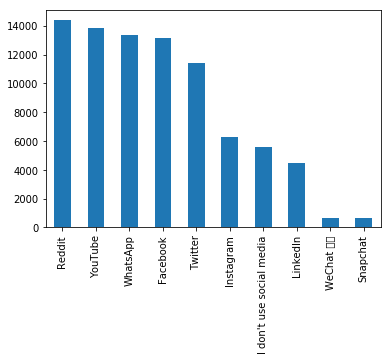

In [37]:
data['SocialMedia'].value_counts().head(10).plot(kind='bar')

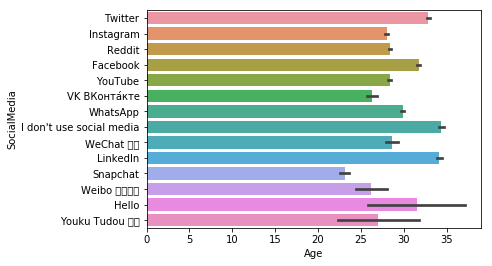

In [42]:
sns.barplot(x='Age',y= 'SocialMedia',data=data)

In [43]:
data['EdLevel'].value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

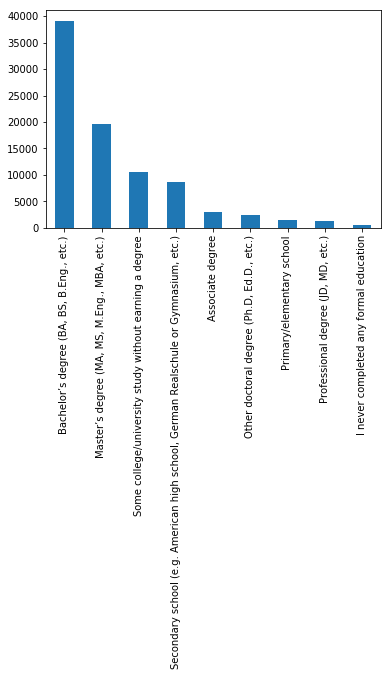

In [44]:
data['EdLevel'].value_counts().plot(kind='bar')

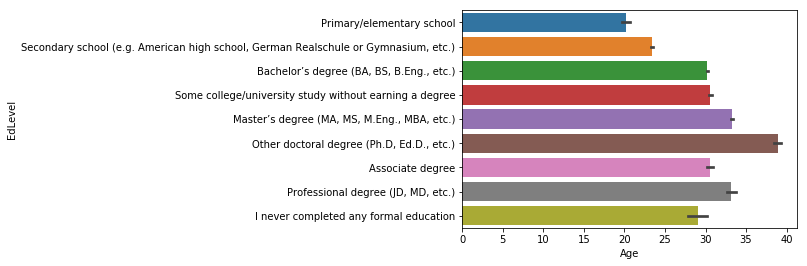

In [45]:
sns.barplot(x='Age',y= 'EdLevel',data=data)